# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Common discrete random variables

## Bernoulli random variable

Single trial with success probability $p$.

In [3]:
from Utils import plotEMF

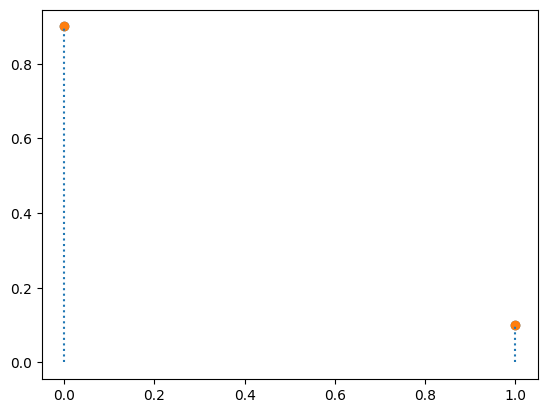

In [28]:
p = 0.1
plotEMF([(0,1-p),(1,p)])

In [29]:
import numpy as np

In [31]:
np.random.randint(0,2,size=10)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [32]:
from Utils import plotEDF,emfToEdf

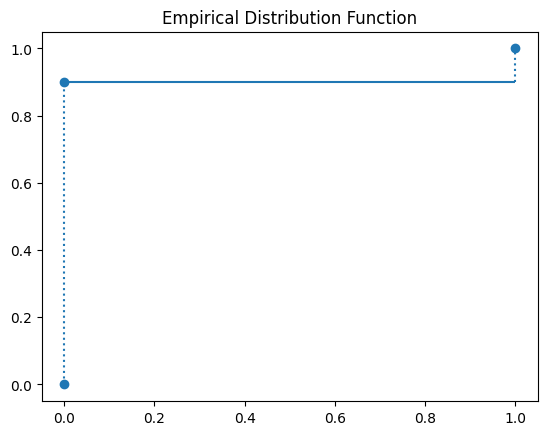

In [33]:
plotEDF(emfToEdf([(0,0),(0,1-p),(1,p)]))

## Binomial random variable

If we do $n$ trials with success probability $p$, then the binomial random variable is the number of successes. The PMF is
$$
    f(x) = {n \choose x} p^x (1-p)^{n-x}
$$
Can only produce numbers $0,1,\ldots,n$.

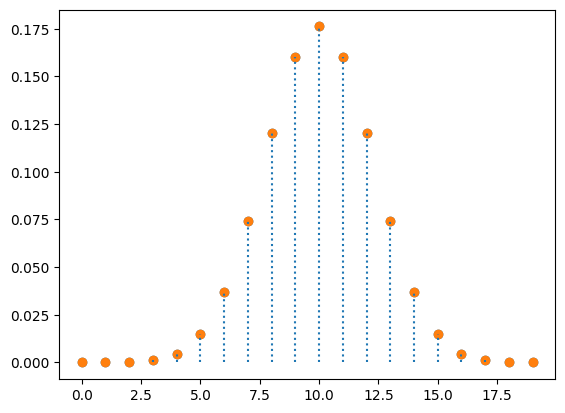

In [36]:
from scipy.special import binom as binomial
n = 20
p = 0.5
plotEMF([(i,binomial(n,i)*(p**i)*((1-p)**(n-i))) for i in range(n)])

In [40]:
np.random.binomial(20,0.5,size=10)

array([13,  7,  8, 12, 15,  8,  6,  6, 12, 14])

In [41]:
[(i,binomial(n,i)*(p**i)*((1-p)**(n-i))) for i in range(n)]

[(0, 9.5367431640625e-07),
 (1, 1.9073486328125e-05),
 (2, 0.0001811981201171875),
 (3, 0.001087188720703125),
 (4, 0.004620552062988281),
 (5, 0.0147857666015625),
 (6, 0.03696441650390625),
 (7, 0.0739288330078125),
 (8, 0.12013435363769531),
 (9, 0.16017913818359375),
 (10, 0.17619705200195312),
 (11, 0.16017913818359375),
 (12, 0.12013435363769531),
 (13, 0.0739288330078125),
 (14, 0.03696441650390625),
 (15, 0.0147857666015625),
 (16, 0.004620552062988281),
 (17, 0.001087188720703125),
 (18, 0.0001811981201171875),
 (19, 1.9073486328125e-05)]

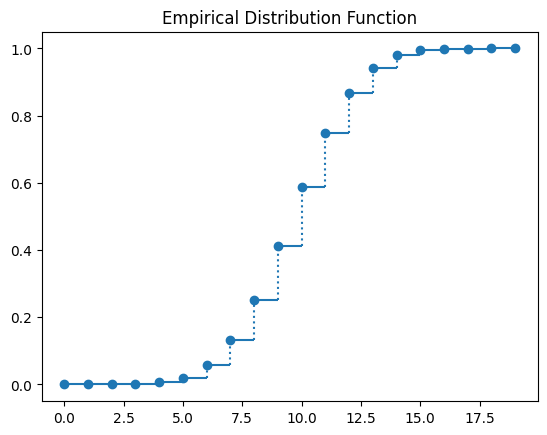

In [25]:
plotEDF(emfToEdf([(i,binomial(n,i)*(p**i)*((1-p)**(n-i))) for i in range(n)]))

## Poisson random variable
Pois($\lambda$) where $\lambda \in (0,\infty)$ is called the rate
$$
    f(x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

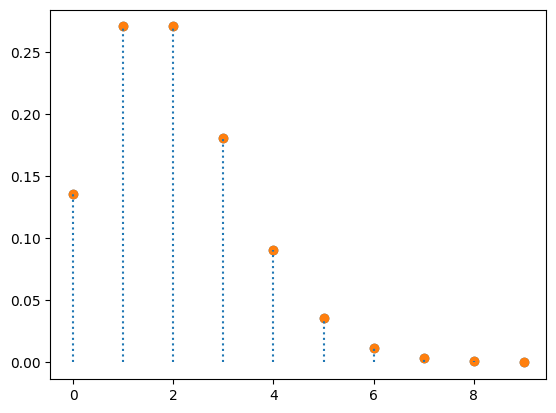

In [56]:
from scipy.special import factorial
from math import exp
l = 2
plotEMF([(i,l**i*exp(-l)/factorial(i)) for i in range(10)])

In [57]:
np.random.poisson(2,size=10)

array([1, 1, 2, 1, 3, 3, 1, 1, 1, 3])

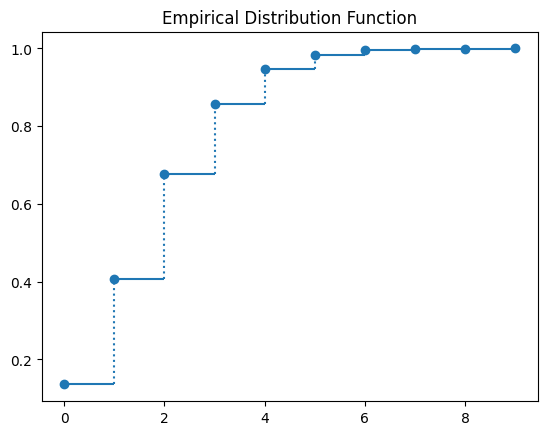

In [58]:
plotEDF(emfToEdf([(i,l**i*exp(-l)/factorial(i)) for i in range(10)]))

## Empirical means

In [60]:
from random import randint

def X():
    """Produces a single random number from DeMoivre(1/3,1/3,1/3)"""
    return randint(0,2)

def empirical_mean(n=1):
    """Produces the empirical mean of n experiments of the X above"""
    Z = [X() for i in range(n)]
    return sum(Z)/n

In [64]:
# Run this to get an observation of X and rerun for another
X

<function __main__.X()>

In [89]:
# Run this to get an observation of the empirical mean of X
# when doing 10 experiments
empirical_mean(10)

1.2

# Common continuous random variables

## The uniform [0,1] random variable
In this case we have

$$
    f(x) = 
    \begin{cases}
    1 & \text{if } 0 \leq x \leq 1 \\
    0 & \text{otherwise}
    \end{cases}
$$

Also, for $x \in [0,1]$ we have

$$
    F(x) = \int_{-\infty}^x f(v) dv = \int_0^x dv = x
$$

<table style="width:95%">
  <tr>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" alt="500px-Uniform_Distribution_PDF_SVG.svg.png" width=250></th>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/500px-Uniform_cdf.svg.png" alt="wikipedia image 500px-Uniform_cdf.svg.png" width=250></th> 
  </tr>
</table>

In [90]:
import numpy as np

In [91]:
np.array([1,2,3])

array([1, 2, 3])

In [92]:
import matplotlib.pyplot as plt

In [93]:
x = np.random.uniform(0,1,size=100)

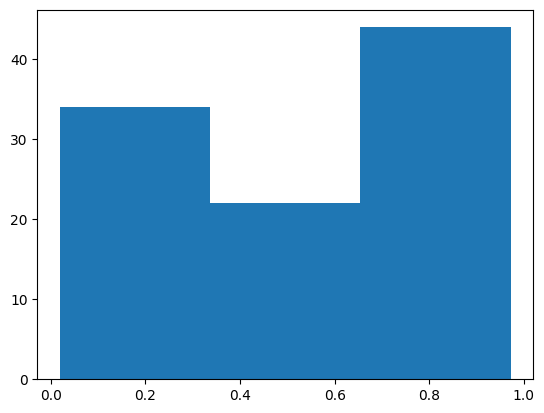

In [97]:
_=plt.hist(x,density=False,bins=3)

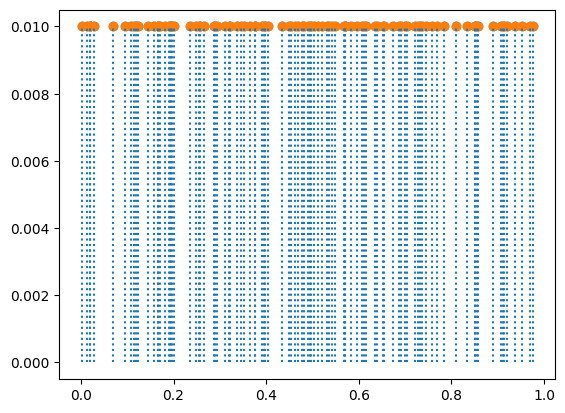

In [102]:
from Utils import makeEDF,makeEMF
plotEMF(makeEMF(np.random.uniform(size=100)))

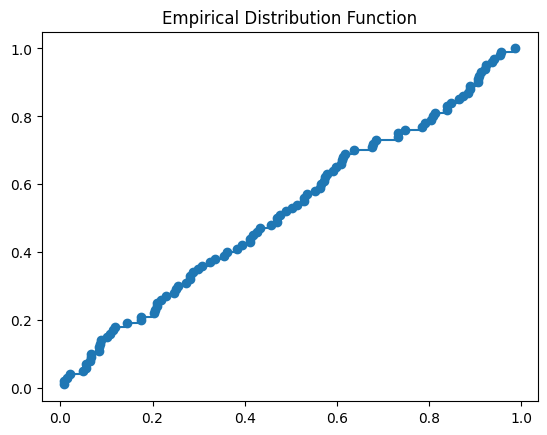

In [103]:
import numpy as np
from Utils import makeEDF,makeEMF,plotEDF
plotEDF(makeEDF(np.random.uniform(size=100)))

## The Gaussian random variable (Normal)
In this case we have
$$
    f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left ( \frac{x-\mu}{\sigma}\right )}
$$
here we have two parameters, the mean $\mu$ and the standard deviation $\sigma$.

In [42]:
np.random.normal(size=10)

array([ 1.01386181, -0.56043332,  0.49921684,  0.88863697, -1.64044673,
        0.37383609, -2.41185133,  1.21347747,  0.21825103,  0.97901204])

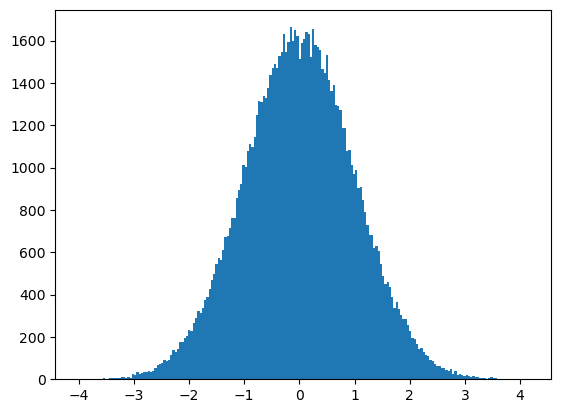

In [43]:
_=plt.hist(np.random.normal(size=100000),bins=200)